# Math 227C Homework 4

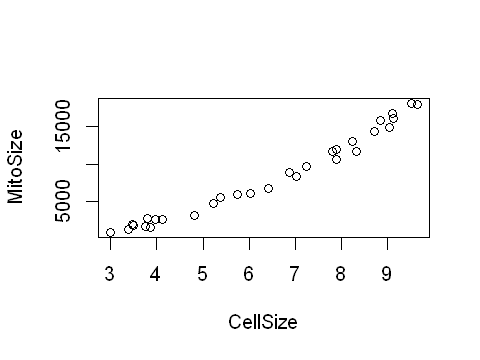

In [1]:
# plot settings
options(repr.plot.width=4, repr.plot.height=3)

# Simulate power-law data

N <- 30
alpha <- 2.3
Y0 <- 100
sigma <- 500

CellSize <- runif(N,3,10) # independent variable
eps <- rnorm(N,0,sigma) # residuals

MitoSize <- Y0*CellSize^alpha + eps

plot(CellSize,MitoSize)

## Part 1 

__(a)__ Use nonlinear least squares (nls) to estimate the parameter $\alpha$ from the simulated data.

In [2]:
nls_estimate   = nls(MitoSize ~ y0*CellSize^a,start=list(y0=10, a=1))
estimate_alpha = coef(nls_estimate)[2]
sprintf("%.10f",estimate_alpha)

[1] "2.2887475682"

In [3]:
nls_error = abs(estimate_alpha - alpha)

Define the __error__ as $e=|\hat{\alpha}-\alpha|$ where $\hat{\alpha}$ is the estimate and $\alpha$ is the true value (which is known because this is simualted data). 

__(b)__ Write a function to execute the simulation and nls fitting, taking in the true model parameters $\alpha, y_0, \sigma$ and the sample size $N$. Plot the error in $\alpha$ estimation, $e$, as a function of the magnitude of the noise, $\sigma$, for a range of $\sigma=(100,2000)$. 

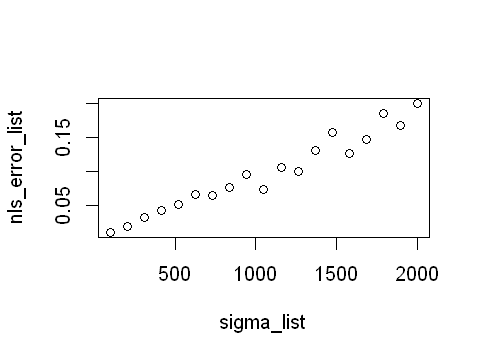

In [4]:
sigma_list      =  seq(100, 2000, length = 19)
nls_error_list  =  c()
for (i in 1 : 19)
{   error_list  =  c()
    for (j in 1 : 34) 
        {simulation   = Y0*CellSize^alpha + rnorm(N, 0, sigma_list[i])
        nls_estim     = nls(simulation ~ y0*CellSize^a, start=list(y0=100, a=1))
        error_list[j] = abs(coef(nls_estim)[2] - alpha)}
    nls_error_list[i] = mean(error_list)}
plot(sigma_list, nls_error_list)

## Part 2

__(a)__ Transform the simulated data to $lY = \mbox{log}(y)$ and $lX = \mbox{log}(x)$. Use linear regression model fit (lm) to estimate the parameter $\alpha$ from the simulated data.

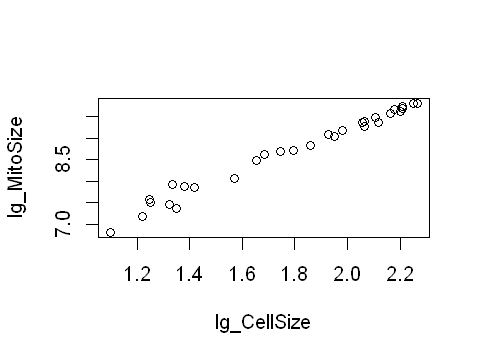

In [5]:
lg_CellSize = log(CellSize)
lg_MitoSize = log(MitoSize)
plot(lg_CellSize, lg_MitoSize)

In [6]:
lm_estimate  = lm(lg_MitoSize ~ lg_CellSize)
lm_alpha     =  coef(lm_estimate)[2]
sprintf("%.10f",lm_alpha)

[1] "2.3787820375"

__(b)__ Write a function that executes the simulation, log-transforms the data, and performs linear regression fitting. Plot the error in $\alpha$ estimation, $e$, as a function of the magnitude of the noise, $\sigma$, for a range of $\sigma=(100,2000)$. 

Note you may need additional code to handle negative measurements.

__(c)__ Overplot the error in  𝛼  from nls and the error from lm (as functions of  𝜎 ).

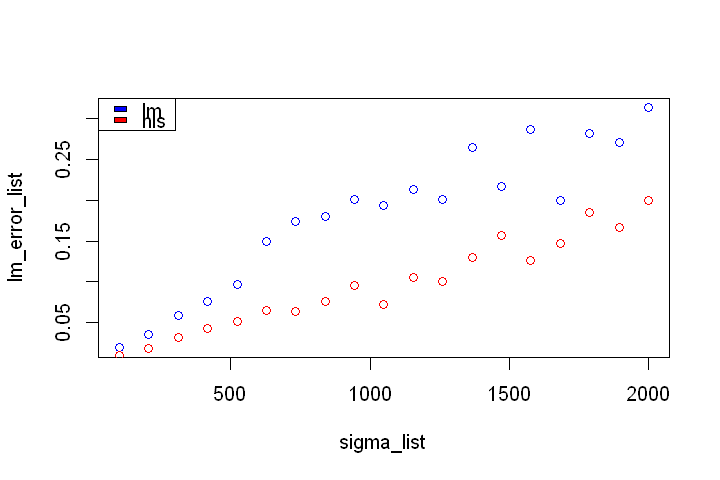

In [7]:
lm_error_list = c()
for (i in 1 : 19)
{error_list = c()
    for (j in 1 : 34) 
       {simulation    = Y0*CellSize^alpha + rnorm(N, 0, sigma_list[i])
        lg_simulation = log(simulation[simulation > 0])
        lg_size       = lg_CellSize[simulation > 0]
        lm_estimate   = lm(lg_simulation ~ lg_size)
        error_list[j] = abs(coef(lm_estimate)[2] - alpha)}
    lm_error_list[i]  = mean(error_list)}
options(repr.plot.width=6, repr.plot.height=4)
plot(sigma_list, lm_error_list,col='blue')
points(sigma_list, nls_error_list,col='red')
legend("topleft",
c("lm","nls"),
fill=c("blue","red")
)

## Part 3

In the above simulations, the independent variable $X$ was chosen from a uniform distribution.

In [8]:
error_diff = function(N, X, sigma_list)
{   nls_error_list = c()
    lm_error_list  = c()
    for (i in 1:5)
    {   Y         = Y0*X^alpha + rnorm(N, 0, sigma_list[i])
        X_new     = X[(X>0) & (Y>0)]
        Y_new     = Y[(X>0) & (Y>0)]
        nls_error = c()
        lm_error  = c()
        for (j in 1 : 34) 
        {   nls_data      = nls(Y_new ~ c*X_new^a, start=list(c=500, a=1))
            nls_error[j]  = abs(coef(nls_data)[2] - alpha)
            lm_data       = lm(log(Y_new)~log(X_new))
            lm_error[j]   = abs(coef(lm_data)[2] - alpha)}
        nls_error_list[i] = mean(nls_error)
        lm_error_list[i]  = mean(lm_error)}
    diff = abs(- nls_error_list + lm_error_list)
    return(diff)
}

__(a)__ Find a distribution of $X$ data that maximizes the difference between error from nls and error from lm.

__(b)__ Find a distribution of $X$ data that minimizes the differende between the error from nls and error from lm.

In [17]:
N = 1000
sigma_list = seq(100, 2000, length=5)
X = rnorm(N, 1, 5)
norm_diff = error_diff(N, X, sigma_list)


In [18]:
X = rexp(N, 0.5)
exp_diff = error_diff(N, X, sigma_list)

In [19]:
X = runif(N, 1, 6)
uniform_diff = error_diff(N, X, sigma_list)

In [20]:
X = rgamma(N, 1, 5)
gamma_diff = error_diff(N, X, sigma_list)

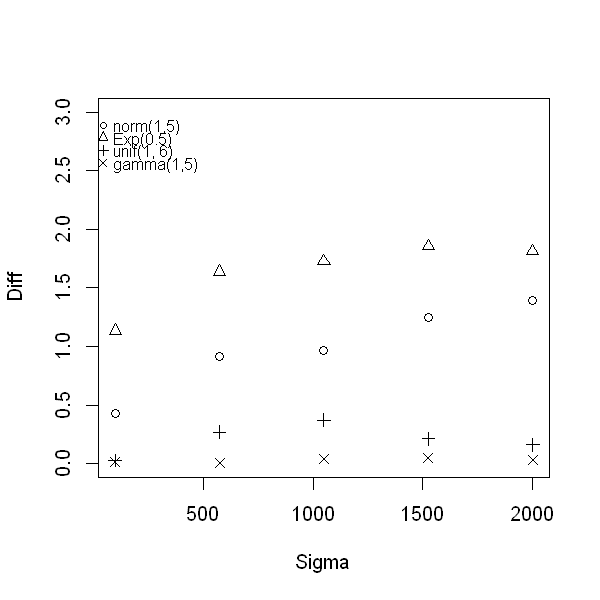

In [21]:
options(repr.plot.width=5, repr.plot.height=5)
plot(sigma_list, norm_diff, pch=1, ylim=range(0:3), xlab='Sigma', ylab='Diff')
points(sigma_list, exp_diff, pch=2)
points(sigma_list, uniform_diff, pch=3)
points(sigma_list, gamma_diff, pch=4)
legend(0,3, legend = c("norm(1,5)", "Exp(0.5)", "unif(1, 6)","gamma(1,5)"),
  pch = c(1,2,3,4,5,6,7,8), 
  bty = "n", 
  pt.cex = 0.8, 
  cex = 0.8, 
  text.col = "black", 
  horiz = F , 
  inset = c(0.1, 0.1),
  xpd=TRUE) 

(a) find that expoential distribution exp(0.5)   will maximizes the difference between error from nls and error from lm.

(b) find that gammga     distribution gamma(1,5) will minimizes the difference between error from nls and error from lm.